In [51]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Dataset**

In [52]:
# Laptops price dataset from Kaggle
file_path = ("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")
df = pd.read_csv(file_path)

# Make column names consistent
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## **Preparing the dataset**



In [53]:
df = df[['ram','storage','screen','final_price']]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


## **EDA**

Look at the final_price variable. Does it have a long tail?

<Axes: xlabel='final_price', ylabel='Count'>

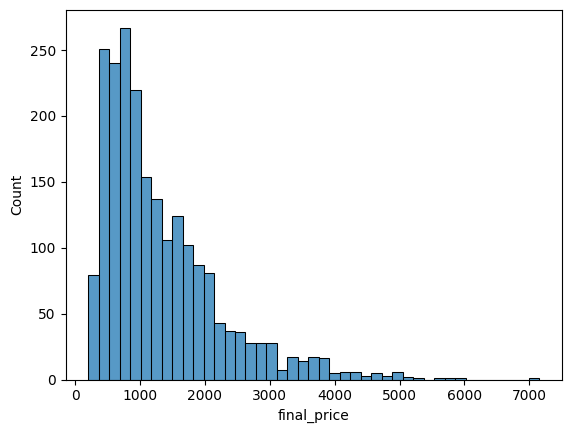

In [54]:
# Plot histogram for 'final_price'
sns.histplot(df['final_price'])

## Question 1
There's one column with missing values. What is it?

In [55]:
df.isnull().sum()

,0
ram,0
storage,0
screen,4
final_price,0


## Question 2
What's the median (50% percentile) for variable 'ram'?

In [56]:
df['ram'].median()

16.0

## Prepare and split the dataset
- > Shuffle the dataset (the filtered one you created above), use seed 42.

In [57]:
n = np.arange(len(df))
np.random.seed(42)
np.random.shuffle(n)

- > Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [58]:
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_val - n_test

In [59]:
n_val, n_test, n_train

(432, 432, 1296)

## Question 3
- > We need to deal with missing values for the column from Q1.
- > We have two options: fill it with 0 or with the mean of this variable.
- > Try both options.
- > For each, train a linear regression model without regularization using the code from the lessons.
- > For computing the mean, use the training only!
- > Use the validation dataset to evaluate the models and compare the RMSE of each option.
- > Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [60]:
#Fill na with 0
df_fillna_zero = df.fillna(0)

In [61]:
#Fill 'screen' na with mean
df_fillna_mean = df.fillna(df['screen'].mean())

Dataframe when fillna with zero

In [62]:
df_train_fillna_zero = df_fillna_zero.iloc[n[:n_train]]
df_val_fillna_zero = df_fillna_zero.iloc[n[n_train:n_train+n_val]]
df_test_fillna_zero = df_fillna_zero.iloc[n[n_train+n_val:]]

In [63]:
# Features when "screen" fillna is 0
X_train_fillna_zero = df_train_fillna_zero.drop('final_price', axis=1).values
X_val_fillna_zero = df_val_fillna_zero.drop('final_price', axis=1).values
X_test_fillna_zero = df_test_fillna_zero.drop('final_price', axis=1).values

In [64]:
#Target variable when "screen" fillna is zero
y_train_fillna_zero = df_train_fillna_zero['final_price'].values
y_val_fillna_zero = df_val_fillna_zero['final_price'].values
y_test_fillna_zero = df_test_fillna_zero['final_price'].values

Dataframe when fillna with "screen" mean

In [65]:
df_train_fillna_mean = df_fillna_mean.iloc[n[:n_train]]
df_val_fillna_mean = df_fillna_mean.iloc[n[n_train:n_train+n_val]]
df_test_fillna_mean = df_fillna_mean.iloc[n[n_train+n_val:]]

In [66]:
# Features when "screen" fillna mean
X_train_fillna_mean = df_train_fillna_mean.drop('final_price', axis=1).values
X_val_fillna_mean = df_val_fillna_mean.drop('final_price', axis=1).values
X_test_fillna_mean = df_test_fillna_mean.drop('final_price', axis=1).values

In [67]:
#Target variable when "screen" fillna is mean
y_train_fillna_mean = df_train_fillna_mean['final_price'].values
y_val_fillna_mean = df_val_fillna_mean['final_price'].values
y_test_fillna_mean = df_test_fillna_mean['final_price'].values

## Train Linear Regression Model

### Linear Regression When fillna is zero

In [68]:
# Features
X = X_train_fillna_zero

# Target
y = y_train_fillna_zero

In [69]:
# Train linear regression for fillna with zero
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # Bias term
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:] # w[0] is the bias and w[1:] are the weights

In [70]:
w0, w = train_linear_regression(X, y)
w0, w

(676.8954853003995, array([ 43.70681555,   0.86506867, -36.10399833]))

### Validation when fillna is zero

In [71]:
# Evaluate the models with RMSE
def rmse(y_val, y_pred):
    error = y_val - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [72]:
X_val = X_val_fillna_zero
y_val = y_val_fillna_zero
y_pred = w0 + X_val.dot(w)

In [73]:
rmse_fillna_zero = rmse(y_val, y_pred)
rmse_fillna_zero.round(2)

597.36

### Linear Regrssion When fillna is mean

In [74]:
# Features
X = X_train_fillna_mean

# Target
y = y_train_fillna_mean

In [75]:
# Train linear regression for fillna with zero
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # Bias term
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:] # w[0] is the bias term and w[1:] are the weights

In [76]:
w0, w = train_linear_regression(X, y)
w0, w

(808.8893345641252, array([ 43.90772323,   0.87134972, -45.18081605]))

## Validation when fillna is mean

In [77]:
# Evaluate the models with RMSE
def rmse(y, y_pred):
    error = y - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [78]:
X_val = X_val_fillna_mean
y_val = y_val_fillna_mean
y_pred = w0 + X_val.dot(w)

In [79]:
rmse_fillna_mean = rmse(y_val, y_pred)
rmse_fillna_mean.round(2)

600.27

In [80]:
(rmse_fillna_zero, rmse_fillna_mean)

(597.3635593619622, 600.2659410617168)

In [81]:
print("RMSE with 0 is slightly better")

RMSE with 0 is slightly better


## Question 4
Now let's train a regularized linear regression.
- > For this question, fill the NAs with 0.
- > Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- > Use RMSE to evaluate the model on the validation dataset.
- > Round the RMSE scores to 2 decimal digits.
- > Which r gives the best RMSE?


In [82]:
#Fill NA with 0
df = df.fillna(0)

# Features X
X_train = df.drop('final_price', axis=1).values
X_val = df.drop('final_price', axis=1).values
X_test = df.drop('final_price', axis=1).values

#Target variable when "screen" fillna is zero
y_train = df['final_price'].values
y_val = df['final_price'].values
y_test = df['final_price'].values

In [83]:
# Train linear regression with regularization
def train_linear_regression_regu(X, y, r):
    ones = np.ones(X.shape[0]) # Bias term
    X = np.column_stack([ones, X]) # Adding bias term to X

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) # Adding regularization term

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y) # weight

    return w[0], w[1:] # w[0] is the bias term and w[1:] are the weights

In [84]:
# Evaluate the models with RMSE
def rmse(y, y_pred):
    error = y - y_pred
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [85]:
# Testing the models with different regularization values
reg = [0, 0.01, 0.1, 1, 5, 10, 100]
for r in reg:
    # Train the model
    w0, w = train_linear_regression_regu(X_train, y_train, r)

    # Predict the target variable
    y_pred = w0 + X_val.dot(w)  # w0 is the bias, w are the weights

    # Evaluate the model using RMSE
    error = rmse(y_val, y_pred)

    print(f"r = {r}, w0 = {w0:.2f}, RMSE = {error:.2f}")

r = 0, w0 = 615.51, RMSE = 590.47
r = 0.01, w0 = 615.14, RMSE = 590.47
r = 0.1, w0 = 611.82, RMSE = 590.47
r = 1, w0 = 580.46, RMSE = 590.48
r = 5, w0 = 472.80, RMSE = 590.60
r = 10, w0 = 383.85, RMSE = 590.82
r = 100, w0 = 87.82, RMSE = 592.28


## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- > Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- > For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- > Fill the missing values with 0 and train a model without regularization.
- > For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- > What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- > Round the result to 3 decimal digits (round(std, 3))

In [86]:
# Function to split data based on different seeds
def split_data(df, seed):
    n = np.arange(len(df))
    np.random.seed(seed)
    np.random.shuffle(n)

    # 60% train, 20% validation, 20% test split
    n_val = int(len(df) * 0.2)
    n_test = int(len(df) * 0.2)
    n_train = len(df) - n_val - n_test

    # Indices for the splits
    train_idx = n[:n_train]
    val_idx = n[n_train:n_train + n_val]
    test_idx = n[n_train + n_val:]

    # Splitting df into train, validation, and test based on indices
    train_df = df.iloc[train_idx]
    val_df = df.iloc[val_idx]
    test_df = df.iloc[test_idx]

    return train_df, val_df, test_df

In [87]:
# Define list of seeds to test
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# List for rmse scores
rmse_scores = []

# Loop over each seed value and evaluate model performance
for seed in seeds:
    # Split data using current seed
    train_df, val_df, test_df = split_data(df, seed)

    # Fill NA with 0 for each split
    train_df = train_df.fillna(0)
    val_df = val_df.fillna(0)
    test_df = test_df.fillna(0)

    # Features X
    X_train = train_df.drop('final_price', axis=1).values
    X_val = val_df.drop('final_price', axis=1).values
    X_test = test_df.drop('final_price', axis=1).values

    # Target variable (y)
    y_train = train_df['final_price'].values
    y_val = val_df['final_price'].values
    y_test = test_df['final_price'].values

    # Train model with regularization
    w0, w = train_linear_regression_regu(X_train, y_train, r=0)

    # Predict on validation set
    y_pred_val = w0 + X_val.dot(w)

    # Calculate RMSE on validation set
    val_rmse = rmse(y_val, y_pred_val)

    # Collect the RMSE score
    rmse_scores.append(val_rmse)

    print(f"Seed: {seed}, Validation RMSE: {val_rmse:.2f}")

Seed: 0, Validation RMSE: 565.45
Seed: 1, Validation RMSE: 636.80
Seed: 2, Validation RMSE: 588.96
Seed: 3, Validation RMSE: 597.81
Seed: 4, Validation RMSE: 571.96
Seed: 5, Validation RMSE: 573.24
Seed: 6, Validation RMSE: 647.34
Seed: 7, Validation RMSE: 550.44
Seed: 8, Validation RMSE: 587.33
Seed: 9, Validation RMSE: 576.10


In [88]:
np.std(rmse_scores).round(3)

29.176

## Question 6
- > Split the dataset like previously, use seed 9.
- > Combine train and validation datasets.
- > Fill the missing values with 0 and train a model with r=0.001.
- > What's the RMSE on the test dataset?

In [89]:
# Laptops price dataset from Kaggle
file_path = ("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")
df = pd.read_csv(file_path)

# Make column names consistent
df.columns = df.columns.str.lower().str.replace(' ', '_')

df = df[['ram','storage','screen','final_price']]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [90]:
# Split data into 80% train and 20% test
n = np.arange(len(df))
np.random.seed(9)
np.random.shuffle(n)

# 80% train, 20% test split
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = len(df) - n_test

# Indices for the splits
test_idx = n[:n_test]
train_idx = n[n_test:]

df = df.fillna(0)
train_df = df.iloc[train_idx]
test_df = df.iloc[test_idx]

In [91]:
test_df.head()

,ram,storage,screen,final_price
2003,32,1000,15.6,1592.89
502,8,512,13.3,1349.00
896,8,512,15.6,549.00
356,32,1000,17.3,2999.00
499,16,1000,16.0,1889.00


In [92]:
# Features X
X_train = train_df.drop('final_price', axis=1).values
X_test = test_df.drop('final_price', axis=1).values

# Target variable (y)
y_train = train_df['final_price'].values
y_test = test_df['final_price'].values

# Train model with regularization
w0, w = train_linear_regression_regu(X_train, y_train, r=0.001)

# Predict on test set
y_pred = w0 + X_test.dot(w)

# Calculate RMSE on test set
test_rmse = rmse(y_test, y_pred)

print(f"Test RMSE: {test_rmse:.2f}")


Test RMSE: 535.08
